In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:

# 数据集的路径
train_dir = 'dataset/train'
val_dir = 'dataset/val'
test_dir = 'dataset/test'

# 图像的尺寸和批大小
img_size = 224
batch_size = 32

In [3]:
# 训练数据的增强
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# 验证和测试数据不需要增强，只需要进行相同的预处理
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [4]:
# 从目录读取数据
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_size, img_size),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')


Found 4798 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.
Found 695 images belonging to 11 classes.


In [5]:
# 加载预训练的 ResNet50 模型
base_model = ResNet50(weights='imagenet', include_top=False)

# 添加自定义层
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # 添加 Dropout 层，比如 50% 的比率
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# 构建模型
model = Model(inputs=base_model.input, outputs=predictions)

# 冻结预训练层
for layer in base_model.layers:
    layer.trainable = False

In [6]:
# 编译模型
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/10


/Users/xingruizhu/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 147s 950ms/step - accuracy: 0.4892 - loss: 1.5784 - val_accuracy: 0.8218 - val_loss: 0.5328
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8162 - loss: 0.5901 - val_accuracy: 0.8415 - val_loss: 0.4755
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.8435 - loss: 0.4725 - val_accuracy: 0.8627 - val_loss: 0.4285
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 150s 985ms/step - accuracy: 0.8702 - loss: 0.3865 - val_accuracy: 0.8671 - val_loss: 0.4021
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 142s 934ms/step - accuracy: 0.8745 - loss: 0.3691 - val_accuracy: 0.8736 - val_loss: 0.3787
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 150s 990ms/step - accuracy: 0.8868 - loss: 0.3326 - val_accuracy: 0.8692 - val_loss: 0.3789
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8920 - loss: 0.3215 - val_accuracy: 0.8758 - val_loss: 0.3821
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 147s 972ms/step - accuracy: 0.8940 - loss: 0.3053 - val_

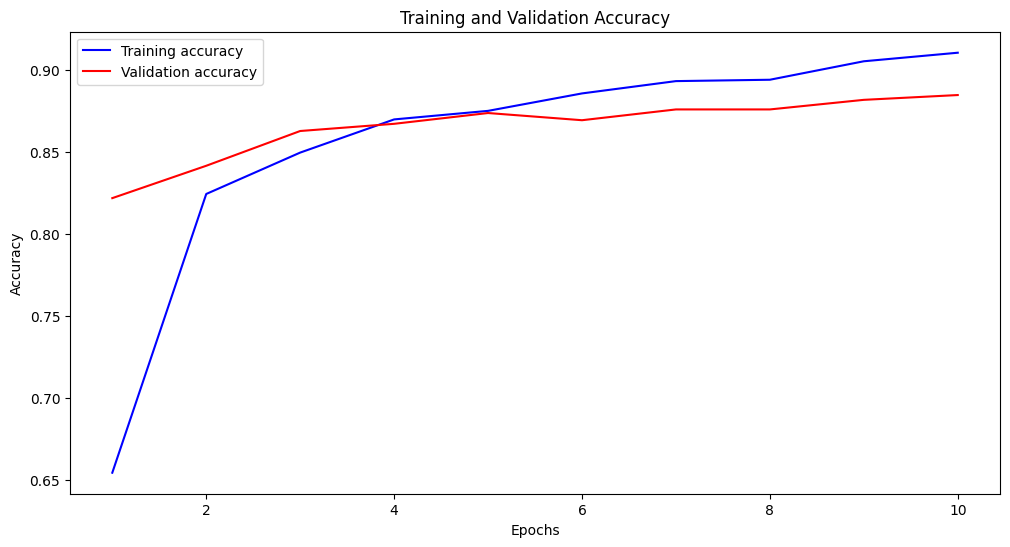

In [7]:
# 训练模型
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.save('model.h5')

In [8]:
# 评估模型
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100}%")



22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 704ms/step - accuracy: 0.9119 - loss: 0.2735
Test accuracy: 90.79136848449707%


In [154]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [155]:
# 加载训练时使用的 ImageDataGenerator
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# 获取类别标签
class_labels = list(train_generator.class_indices.keys())

Found 4798 images belonging to 11 classes.


In [156]:
# 加载模型
model = load_model('model.h5')

In [157]:
# 加载要预测的图像 lightning
img = image.load_img('lightning1839.jpg', target_size=(224, 224))  # 调整图像大小与模型输入相匹配
img_array = image.img_to_array(img)  # 将图像转换为数组
img_array = np.expand_dims(img_array, axis=0)  # 增加一个维度，因为模型预期的是批次数据
img_array = preprocess_input(img_array)

# 进行预测
lightning_predictions = model.predict(img_array)[0]
print(lightning_predictions)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
[4.9552887e-06 3.2617137e-01 5.3400190e-06 3.1898542e-06 1.4129180e-05
 6.6706437e-01 3.7169596e-04 5.7972167e-03 9.7850985e-05 4.4353059e-04
 2.6290512e-05]


In [158]:
# 加载要预测的图像 rain
img = image.load_img('rime4939.jpg', target_size=(224, 224))  # 调整图像大小与模型输入相匹配
img_array = image.img_to_array(img)  # 将图像转换为数组
img_array = np.expand_dims(img_array, axis=0)  # 增加一个维度，因为模型预期的是批次数据
img_array = preprocess_input(img_array)


# 进行预测
rime_predictions = model.predict(img_array)[0]
print(rime_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[5.7920959e-05 1.3283747e-07 1.3801655e-03 2.4315954e-05 4.5146692e-08
 1.8229647e-04 1.4186766e-07 1.8778114e-06 9.9834609e-01 6.2227905e-08
 6.8553663e-06]


In [159]:
# 加载要预测的图像 fogsmog
img = image.load_img('fogsmog4093.jpg', target_size=(224, 224))  # 调整图像大小与模型输入相匹配
img_array = image.img_to_array(img)  # 将图像转换为数组
img_array = np.expand_dims(img_array, axis=0)  # 增加一个维度，因为模型预期的是批次数据
img_array = preprocess_input(img_array)


# 进行预测
fogsmog_predictions = model.predict(img_array)[0]
print(fogsmog_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[3.4031185e-08 9.0995228e-01 1.1001631e-07 7.7719925e-08 6.5924063e-08
 1.3522136e-07 7.3738292e-06 1.0890000e-07 4.6918959e-07 8.9362495e-02
 6.7681260e-04]


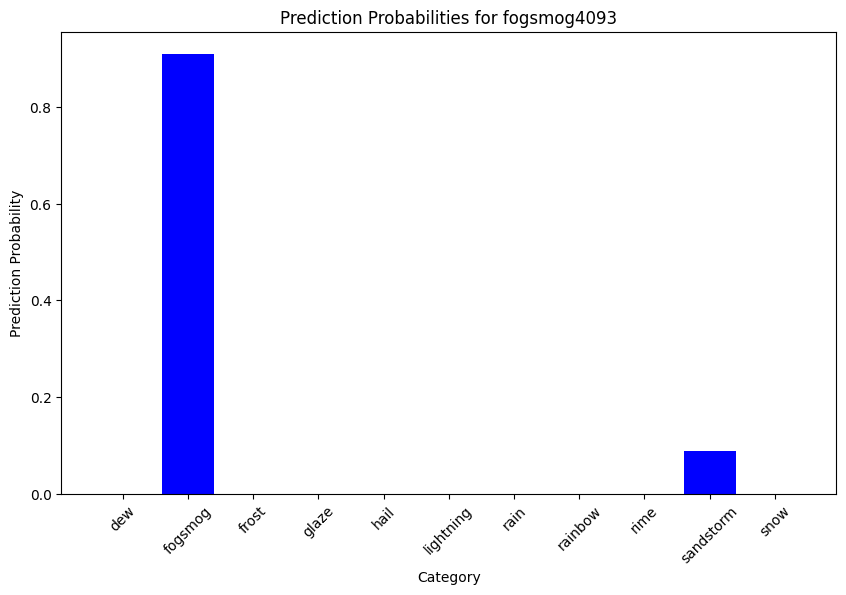

[3.4031185e-08 9.0995228e-01 1.1001631e-07 7.7719925e-08 6.5924063e-08
 1.3522136e-07 7.3738292e-06 1.0890000e-07 4.6918959e-07 8.9362495e-02
 6.7681260e-04]


In [160]:
# 用于 "fogsmog4093.jpg" 的预测结果
plt.figure(figsize=(10, 6))
bars = plt.bar(class_labels, fogsmog_predictions, color='blue')
plt.xlabel('Category')
plt.ylabel('Prediction Probability')
plt.title('Prediction Probabilities for fogsmog4093')
# 在每个柱子上添加概率值
# for bar in bars:
#     height = bar.get_height()  # 获取柱子的高度（概率值）
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
#              ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

print(fogsmog_predictions)

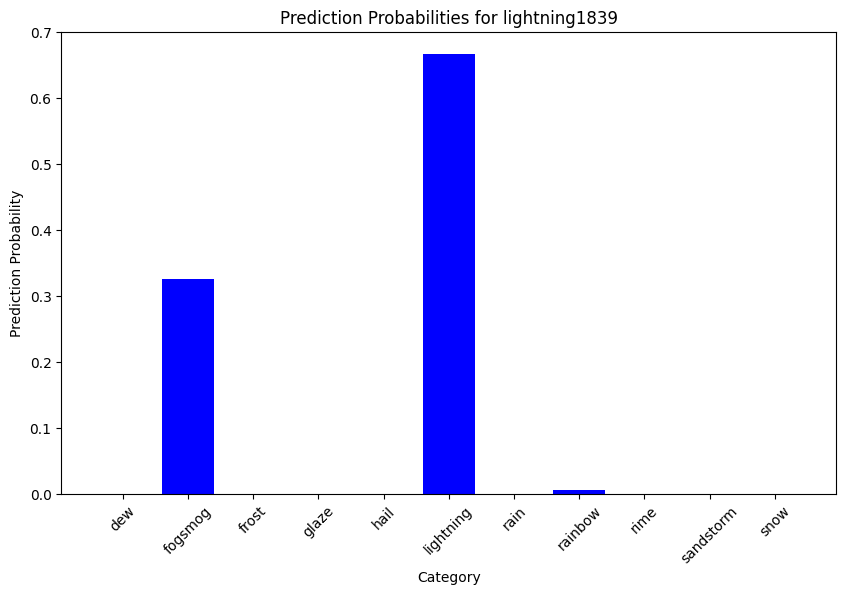

[4.9552887e-06 3.2617137e-01 5.3400190e-06 3.1898542e-06 1.4129180e-05
 6.6706437e-01 3.7169596e-04 5.7972167e-03 9.7850985e-05 4.4353059e-04
 2.6290512e-05]


In [161]:
# 用于 "lightning1839.jpg" 的预测结果
plt.figure(figsize=(10, 6))
plt.bar(class_labels, lightning_predictions, color='blue')
plt.xlabel('Category')
plt.ylabel('Prediction Probability')
plt.title('Prediction Probabilities for lightning1839')
# 在每个柱子上添加概率值
# for bar in bars:
#     height = bar.get_height()  # 获取柱子的高度（概率值）
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
#              ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

print(lightning_predictions)

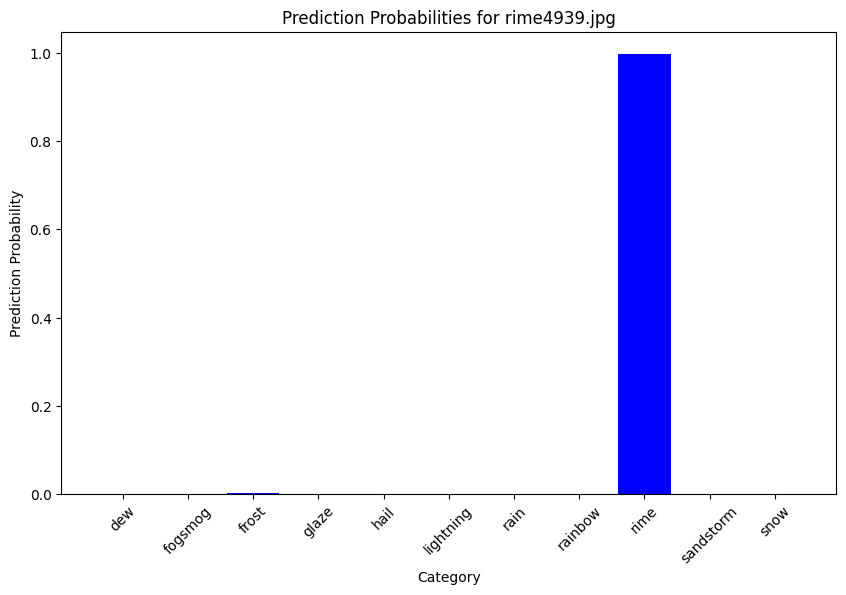

[5.7920959e-05 1.3283747e-07 1.3801655e-03 2.4315954e-05 4.5146692e-08
 1.8229647e-04 1.4186766e-07 1.8778114e-06 9.9834609e-01 6.2227905e-08
 6.8553663e-06]


In [162]:
# 用于 "lightning1839.jpg" 的预测结果
plt.figure(figsize=(10, 6))
plt.bar(class_labels, rime_predictions, color='blue')
plt.xlabel('Category')
plt.ylabel('Prediction Probability')
plt.title('Prediction Probabilities for rime4939.jpg')
# 在每个柱子上添加概率值
# for bar in bars:
#     height = bar.get_height()  # 获取柱子的高度（概率值）
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
#              ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

print(rime_predictions)

In [163]:
# print("rain:    ", rime_predictions)
# print("fog:     ", fogsmog_predictions)
# print("lightning:       ", lightning_predictions)